In [91]:
import csv
import os
import scipy.io
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [92]:
folder_to_name = {'hsbam': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'traffic_jam': 'tjdpp',
                  'bam_mutants': 'bam',
                  'oskar': 'osk'
                 }
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/raw data"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [244]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_inputs_and_outputs/inputs/03_02_2018"
files = os.listdir(matrices_dir)
data = {}
for f in files:
    if f.endswith('_data.csv') and f != 'GC_data.csv':
        print(f)
        exp = pd.read_csv(os.path.join(matrices_dir, f), sep=',', index_col  = 0) #sep='\t',
        data[f.split('.')[0]] = exp
        

TF_data.csv
IC_data.csv
CC_data.csv
SW_data.csv
FSC_data.csv
SH_data.csv


In [223]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)
gene_sym_to_id = {}
gene_id_to_sym = {}
gtf.head()

,0,1,2,3,4,5,6,7,8
0,3R,FlyBase,gene,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; gene_name ""Myo81F""; gen..."
1,3R,FlyBase,gene,722370,722621,.,-,.,"gene_id ""FBgn0085804""; gene_name ""CR41571""; ge..."
2,3R,FlyBase,gene,1031171,1031354,.,+,.,"gene_id ""FBgn0039987""; gene_name ""CR12798""; ge..."
3,3R,FlyBase,gene,1366234,1366601,.,-,.,"gene_id ""FBgn0267798""; gene_name ""CR46123""; ge..."
4,3R,FlyBase,gene,1865108,1866008,.,-,.,"gene_id ""FBgn0267797""; gene_name ""CR46122""; ge..."


In [224]:
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_sym_to_id[sym] = i
    gene_id_to_sym[i] = sym 

In [225]:
def convert_df_from_Fbgn_ids_to_symbols(df):
    subset_index = set(gene_id_to_sym.keys()).intersection(df.index)
    if len(subset_index) == 0:
        print('Error: No overlap found. Aborting')
        return
    new_index = [gene_id_to_sym[i] for i in subset_index]
    lost_genes = df.shape[0] - len(new_index)
    print('Converting dataframe. Losing {} genes out of an index size of {}'.format(lost_genes, df.shape[0]))
    df = df.loc[subset_index, :]
    df.index = new_index
    return df

def convert_df_from_symbols_to_Fbgn_ids(df):
    subset_index = set(gene_sym_to_id.keys()).intersection(df.index)
    if len(subset_index) == 0:
        print('Error: No overlap found. Aborting')
        return
    new_index = [gene_sym_to_id[sym] for sym in subset_index]
    lost_genes = df.shape[0] - len(new_index)
    print('Converting dataframe. Losing {} genes out of an index size of {}'.format(lost_genes, df.shape[0]))
    df = df.loc[subset_index, :]
    df.index = new_index
    return df
def convert_col_from_Fbgn_ids_to_symbols(col):
    new_col = [gene_id_to_sym[i] if i in gene_id_to_sym.keys() else i for i in col]
    return new_col

In [85]:
data['GC_data']

,soma_wtF_ACCTTTAAGAGGGCTT,soma_wtF_GCAAACTCAAAGTGCG,germ_wtF_AAACCTGAGCCTATGT,germ_wtF_AAGGAGCGTCGGGTCT,germ_wtF_AATCGGTAGAAACCAT,germ_wtF_AATCGGTTCTGACCTC,germ_wtF_ACACTGACACTCAGGC,germ_wtF_ACCAGTACACTTCTGC,germ_wtF_ACGATACGTCATACTG,germ_wtF_ACGATACTCAGGTAAA,...,germ_wtJ_TTAACTCGTTACCGAT,germ_wtJ_TTAGTTCCAAGAGTCG,germ_wtJ_TTCTACACACACATGT,germ_wtJ_TTGACTTGTATTAGCC,germ_wtJ_TTGACTTTCAACCATG,germ_wtJ_TTGGAACAGCCGATTT,germ_wtJ_TTGGAACCATGGTCTA,germ_wtJ_TTGGCAATCTGAGGGA,germ_wtJ_TTTATGCCATCCGTGG,germ_wtJ_TTTGGTTTCTGCCCTA
l(2)gl,0.000000,0.000000,0.693764,0.340006,0.669468,0.594356,0.492830,0.565278,0.663355,0.818268,...,0.411642,0.289013,0.343200,0.490598,0.204374,0.255445,0.000000,0.474042,0.596259,0.535905
Ir21a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CR43609,0.000000,0.000000,0.000000,0.340006,0.000000,0.000000,0.000000,0.225790,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.135857,0.000000,0.141168,0.000000,0.303430
Cda5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CR46254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dbr,0.000000,0.434230,0.693764,0.340006,0.669468,0.796514,0.276473,0.409871,0.272897,0.612144,...,0.226855,0.407240,0.704891,0.490598,0.000000,0.362247,0.257176,0.646952,0.502139,0.163180
CR44987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147761,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
galectin,0.574384,0.000000,0.000000,0.000000,0.240860,0.126906,0.147761,0.000000,0.000000,0.000000,...,0.000000,0.154912,0.000000,0.275088,0.204374,0.000000,0.257176,0.141168,0.151057,0.303430
CG11374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
net,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [121]:
sample_names = []
for d in data.values():
    sample_names.extend([s.split('_')[2] + '-1' for s in d.columns])

In [221]:
combined = pd.concat([data_frames['wtF'], data_frames['wtJ']], join='outer', axis  =1 )

In [226]:
combined = convert_df_from_symbols_to_Fbgn_ids(combined[sample_names])

Converting dataframe. Losing 88 genes out of an index size of 17433


In [231]:
combined.sum()

AAACCTGAGAGGACGG-1    14719
AAAGCAATCCTTGGTC-1    21163
AACACGTAGTGGGCTA-1     6956
AACACGTGTAATCACC-1    21333
AACACGTGTCGGATCC-1    20636
AACCGCGCATGTAGTC-1    26482
AACTCCCGTAAACACA-1    13262
AACTTTCGTAGCCTCG-1     7802
ACAGCCGAGCCACGCT-1    19364
ACCTTTACACATTAGC-1    19243
ACGAGCCCATATACCG-1    17746
ACGAGCCGTAGCAAAT-1    28340
ACGCAGCTCATTGCGA-1    58644
ACGGAGAGTAGAGGAA-1    20468
ACGGGCTAGTGTGGCA-1     8124
ACTATCTGTATCGCAT-1    21288
ACTGCTCAGTCTCCTC-1    15854
AGAATAGGTTATCGGT-1    12898
AGACGTTGTATTAGCC-1    18710
AGATTGCTCCAAGTAC-1     8216
AGCGGTCAGTCAATAG-1    17118
AGCGTCGCATCTGGTA-1     6784
AGCGTCGTCTTAGCCC-1    51719
AGGCCACTCGCCAGCA-1    30818
AGTTGGTCAGTAAGAT-1    29567
ATAGACCAGGGCTTCC-1     9820
ATAGACCGTCATGCAT-1    25677
ATAGACCGTCTACCTC-1    24022
ATCACGATCTCTGCTG-1    12550
ATCATGGTCTACTATC-1    40008
                      ...  
GTGCATACACCTCGGA-1    20861
GTGCTTCCATTCCTGC-1    12077
GTGTGCGAGTACGCGA-1    15374
GTGTTAGTCATGGTCA-1    15425
TAAGTGCAGTCCGGTC-1  

In [232]:
scale_factor = 10000
# pseudocount added so that log isn't taken of 0
combined_transformed = np.log((combined / combined.sum() *  scale_factor) + 1)

In [236]:
combined_transformed.isnull().any().any()

False

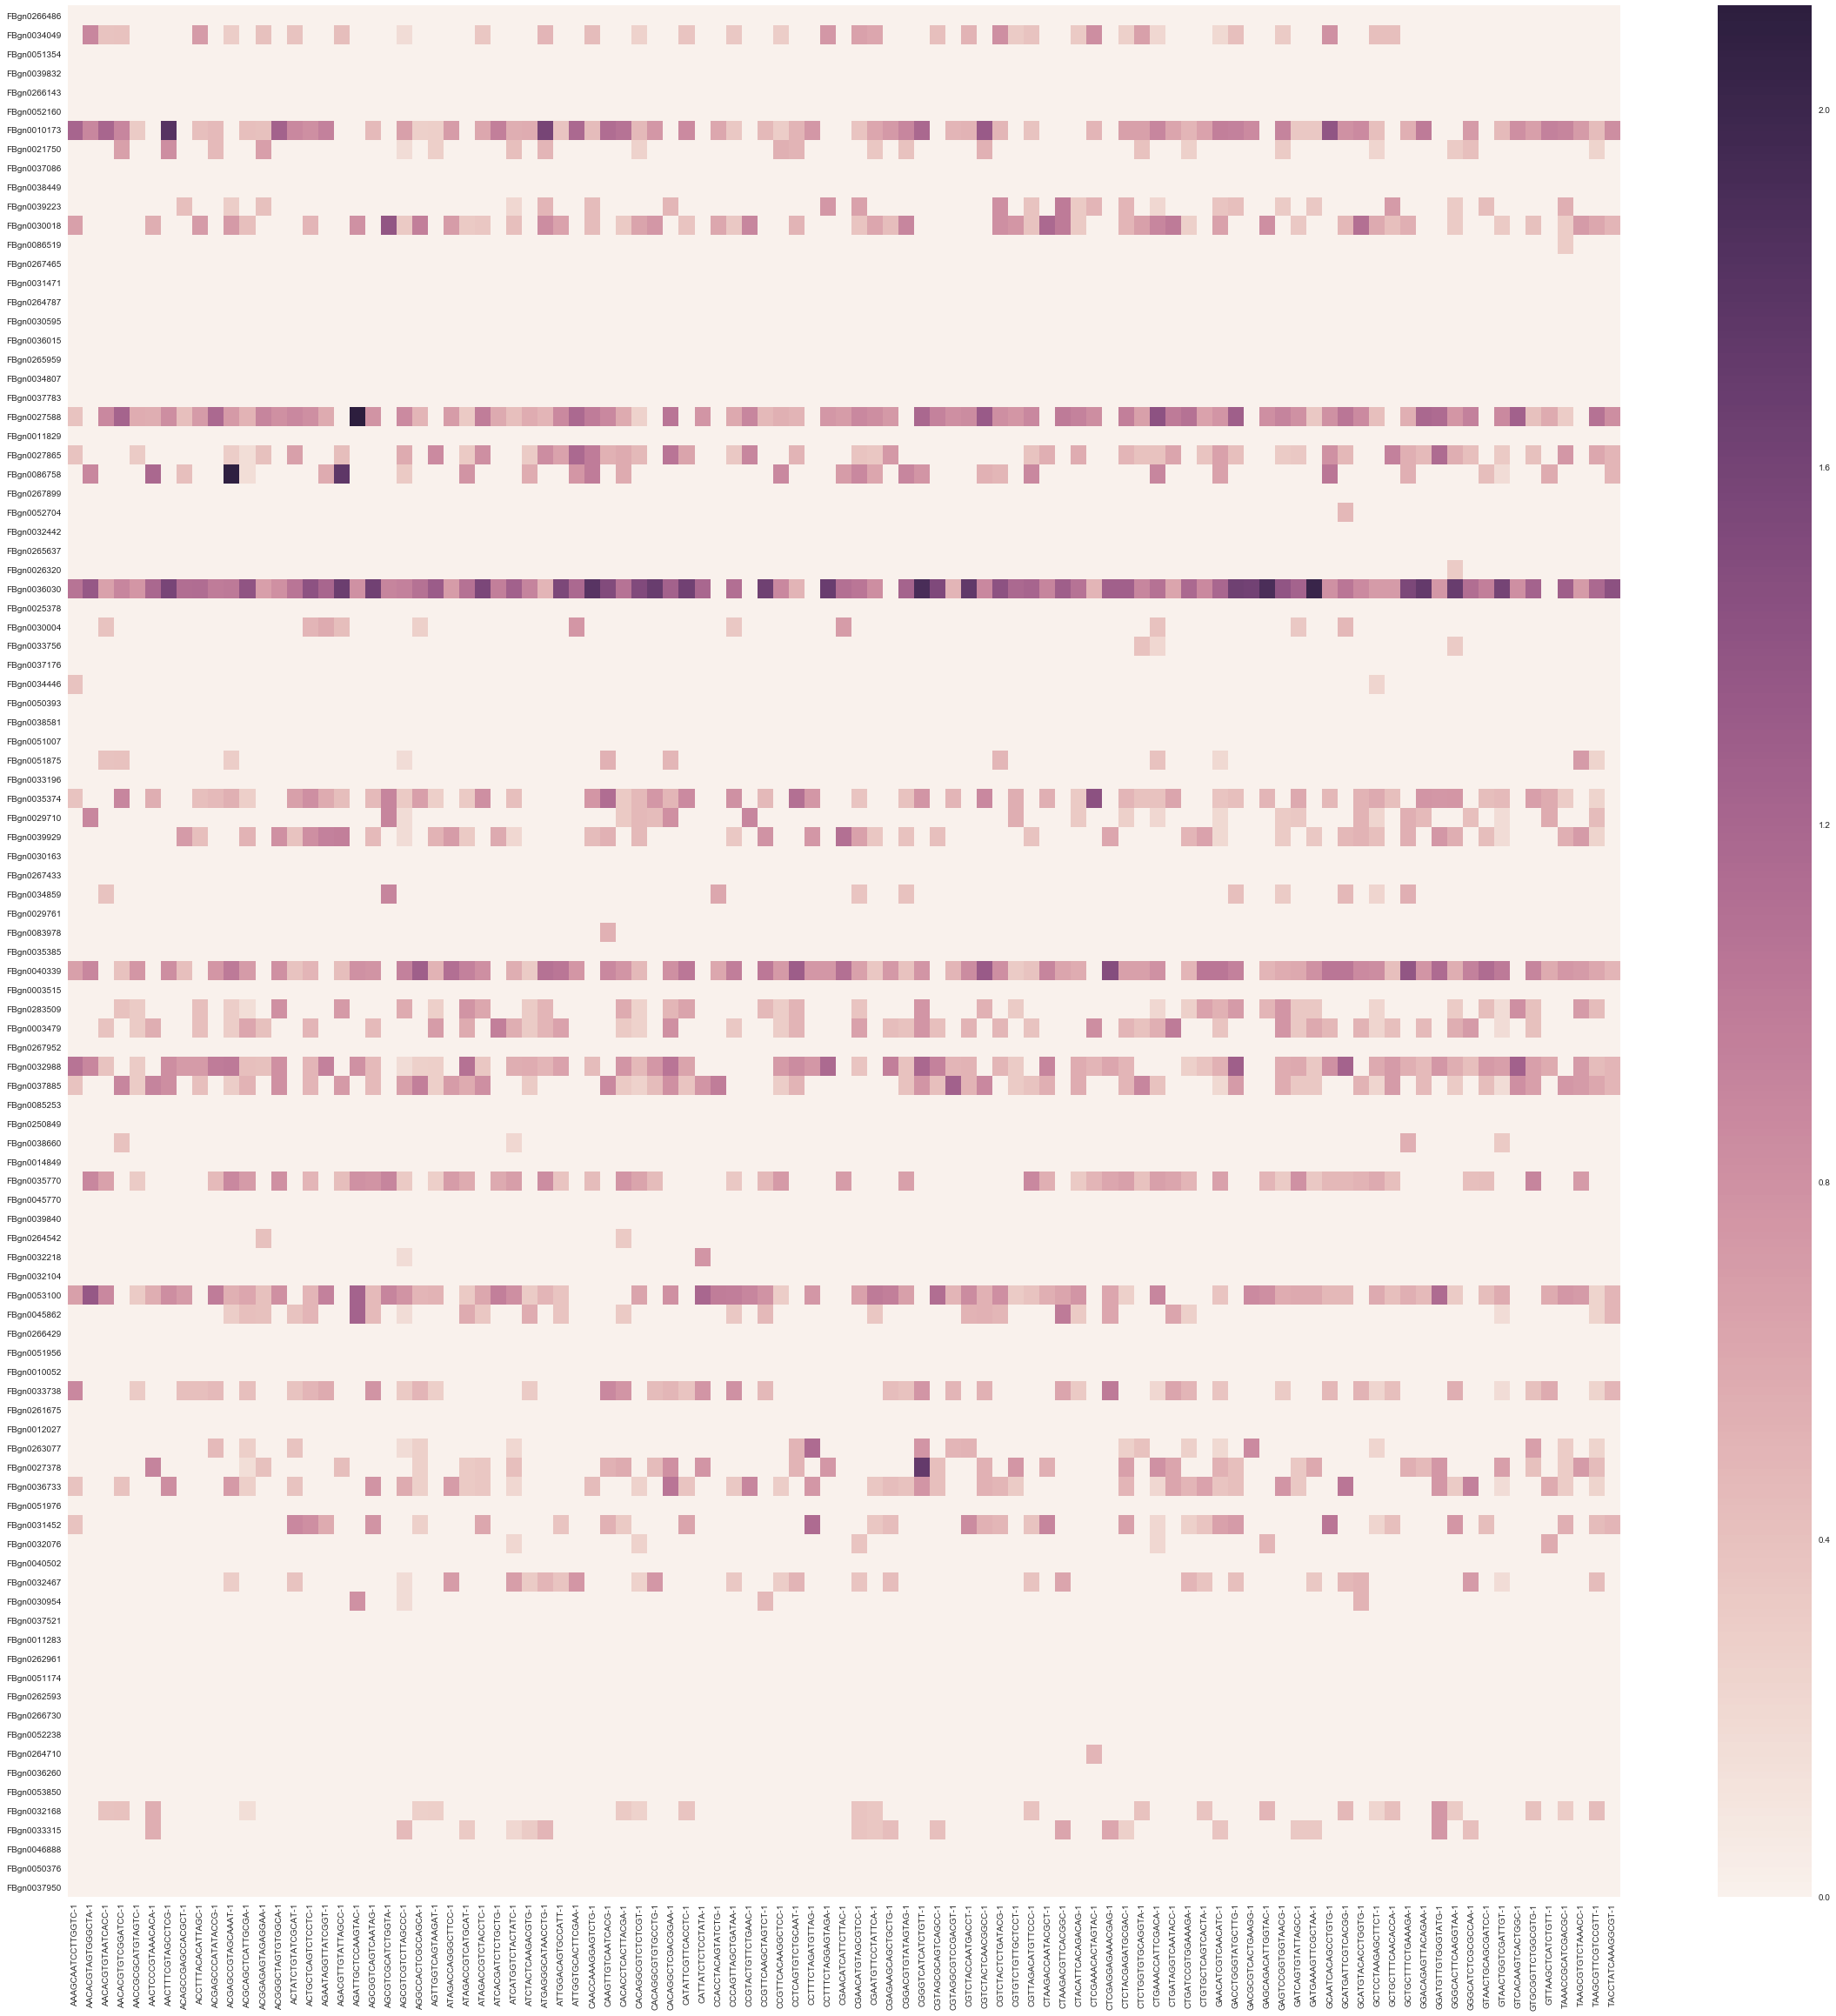

In [229]:
plt.figure(figsize=(40, 40))
sns.heatmap(combined_transformed.iloc[1:100, 1:100])

In [147]:
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/embryo_raw"
embryo = pd.read_csv(os.path.join(matrices_dir, 'dge_raw.txt'), sep='\t', index_col=0, header=None)

In [164]:
ribosomal_in_embryo = []
for i in embryo.index:
    o = str(i)
    if o.startswith('Rp'):
        ribosomal_in_embryo.append(o)

In [166]:
embryo.shape

(8924, 1297)

In [167]:
len(ribosomal_in_embryo)

129

In [156]:
ribosomal_in_embryo

NameError: name 'ribosomal_in_embryo' is not defined

In [245]:
combined_transformed.to_csv(os.path.join(matrices_dir, "wtF_and_wtJ_big_network_combined_without_GC.tsv"), sep='\t')

In [246]:
combined_transformed.shape

(7133, 1435)

In [240]:
nGene_nonzero = combined_transformed[combined_transformed > 0].count(axis = 1)

In [241]:
combined_transformed = combined_transformed[nGene_nonzero > 28]

In [242]:
combined_transformed.shape

(7133, 1435)

In [214]:
gene20_list = []
working_array = combined_transformed.values
num_rows = np.size(working_array, axis = 0)
num_columns = np.size(working_array, axis = 1)
for i in range(0, num_rows):
    nonzero_samples = np.count_nonzero(working_array[i, :])
    percentage_nonzero = float(nonzero_samples)/num_columns
    if percentage_nonzero >= .001:
        gene20_list.append(i)

In [218]:
combined_transformed[combined_transformed > 0].count(axis=1)

CG11023        False
l(2)gl          True
Ir21a          False
CR43609        False
Cda5           False
CR46254        False
CR45339        False
CR45340        False
dbr             True
CR44987        False
galectin        True
CG11374        False
net            False
Zir             True
CG11377         True
Nhe1           False
Sam-S           True
ND-15           True
CG13694        False
CG4822         False
CG3164          True
CR44969        False
Gs1            False
CR44185        False
CR44186        False
CG31975        False
ovm            False
CG31974        False
CG11454         True
CG42399        False
               ...  
CR46190        False
CR46279        False
CG46192        False
CR46150        False
CG46193        False
CR46151        False
CR41423        False
CR40801        False
CR46152        False
Mst77Y-4       False
CG45764        False
CG45765        False
CR45771        False
CG45766        False
CR45772        False
CR45773        False
Mst77Y-7     

In [ ]:
7244 : 7873

In [ ]:
6677 : 6893

In [ ]:
6065 : 6144

In [215]:
len(gene20_list)

9722

In [187]:
embryo.sum(axis=1).sort_values()

0
CG10864             5
CG34025             5
Reg-2               5
vri                 5
CG4577              5
sxe2                6
Him                 6
Osi15               6
Ctr1B               6
CR45631             6
CG16848             6
CG15864             6
shf                 6
CR32252             6
CR45042             6
Fbp2                6
CG6125              6
Picot               6
NAAT1               6
CG9780              6
CR43651             7
CR45174             7
CG2964              7
sug                 7
RpL22-like          7
CG14752             7
Spn28B              7
CG10178             7
CG15020             7
CG1958              7
                ...  
RpL9           197970
eIF-5A         201158
RpL14          201220
Tctp           201356
RpL37A         201438
RpS27A         202063
RpL36          202548
RpL27          202595
RpS16          204059
CG13427        205702
RpS10b         207049
RpL37a         207602
RpLP1          213589
RpS8           218031
RpS23   

In [139]:
ribosomal_genes = [r for r in gene20_names if r.startswith('Rp')]

1041

In [10]:
data_frames['96h'].shape

(17433, 1697)

In [11]:
np.count_nonzero(data_frames['96h'].values[:, 0])

4116

In [12]:
np.size(data_frames['96h'].values[:, 0])

17433

In [13]:
num_columns = np.size(data_frames['96h'].values, axis=1)
nonzero_list = []
for j in range(0, num_columns):
    nonzero_count = np.count_nonzero(data_frames['96h'].values[:, j])
    nonzero_list.append(nonzero_count)
    
average_nonzero = np.average(nonzero_list)
print(average_nonzero)    


3504.55745433


In [14]:
average_nonzero_dict = dict()
for folder in folder_to_name:
    num_columns = np.size(data_frames[folder].values, axis=1)
    nonzero_list = []
    for j in range(0, num_columns):
        nonzero_count = np.count_nonzero(data_frames[folder].values[:, j])
        nonzero_list.append(nonzero_count)
    average_nonzero = np.average(nonzero_list)
    average_nonzero_dict[folder] = average_nonzero
    
    
    
    
    
    

In [15]:
print(average_nonzero_dict)

{'wtF': 3275.1420982735722, 'traffic_jam': 3116.5708661417325, '96h': 3504.5574543311727, 'hsbam': 2785.4448881789135, 'oskar': 3241.7921174652242, 'wtJ': 3184.3820033955858, 'bam_mutants': 3471.5268676277851}


In [16]:
data_frames['96h'].index

Index(['CG11023', 'l(2)gl', 'Ir21a', 'CR43609', 'Cda5', 'CR46254', 'CR45339',
       'CR45340', 'dbr', 'CR44987',
       ...
       'CR45776', 'CG45770', 'Mst77Y-13', 'CR45777', 'CR43176', 'CR45779',
       'CR45780', 'Pp1-Y2', 'ORY', 'CCY'],
      dtype='object', length=17433)

In [189]:
gene20_list = []
working_array = data_frames['96h'].values
num_rows = np.size(working_array, axis = 0)
num_columns = np.size(working_array, axis = 1)
for i in range(0, num_rows):
    nonzero_samples = np.count_nonzero(working_array[i, :])
    percentage_nonzero = nonzero_samples/num_columns
    if percentage_nonzero >= .01:
        gene20_list.append(i)

In [78]:
ribosomal_genes

['Rpp30',
 'RpI135',
 'RpLP1',
 'RpS21',
 'RpL40',
 'RpL27A',
 'Rpn11',
 'RpL37A',
 'RpL36A',
 'RpS13',
 'RpS2',
 'RpL13',
 'RpL7',
 'RpS27A',
 'RpL9',
 'RpL24',
 'RpII33',
 'Rpb11',
 'RpS26',
 'RpL30',
 'Rpn3',
 'RpL21',
 'RpL5',
 'RpL38',
 'Rpt1',
 'RpL31',
 'RpLP0-like',
 'RpS15Ab',
 'Rpb5',
 'RpIII128',
 'RpS11',
 'Rpn13',
 'RpS23',
 'RpI1',
 'Rpn6',
 'Rpb12',
 'RpS15',
 'RpLP2',
 'RpL18A',
 'RpL11',
 'RpS18',
 'RpL29',
 'RpS16',
 'RpS24',
 'RpL23',
 'Rpi',
 'RpL12',
 'RpL39',
 'Rpn8',
 'RpL41',
 'RpL19',
 'RpL23A',
 'RpL8',
 'RpL28',
 'RpL18',
 'RpL14',
 'RpS17',
 'RpS9',
 'RpL10Ab',
 'RpS12',
 'RpS4',
 'Rpn12',
 'RpL26',
 'Rpn1',
 'Rpn10',
 'Rpb8',
 'RpLP0',
 'RpL10',
 'RpL15',
 'RpII18',
 'RpL35A',
 'RpL13A',
 'Rpn5',
 'RpA-70',
 'RpL34b',
 'Rpt3R',
 'RpS29',
 'RpS25',
 'RpL3',
 'RpL24-like',
 'RpII140',
 'RpII15',
 'RpS5b',
 'Rpb7',
 'RpS20',
 'RpS30',
 'RpI12',
 'Rpn7',
 'RpS3',
 'Rpn9',
 'Rpt5',
 'Rpt2',
 'RpS19b',
 'Rpb10',
 'RpS27',
 'RpL27',
 'RpL34a',
 'RpS10a',
 'RpL4',


In [180]:
ribosomal_genes = [r for r in gene20_names if r.startswith('Rp')]

In [181]:
len(ribosomal_genes)

92

In [179]:
gene20_names = []
for i in range(0, len(gene20_list)):
    gene_name = embryo.index[gene20_list[i]]
    gene20_names.append(gene_name)
    
print(gene20_names)
    

['14-3-3epsilon', '14-3-3zeta', 'Aac11', 'Aats-tyr', 'Acn', 'Act42A', 'Act5C', 'Adk2', 'AdSS', 'ago', 'AGO1', 'Akap200', 'akirin', 'Ald', 'alph', 'alpha-Cat', 'alphaTub84B', 'alphaTub84D', 'alt', 'Ama', 'Amun', 'Aos1', 'aph-1', 'Aps', 'Arf102F', 'Arf79F', 'arm', 'Arpc2', 'Arpc4', 'Arpc5', 'Ars2', 'asf1', 'Atg18a', 'Atg8a', 'ATPsyn-b', 'ATPsyn-beta', 'ATPsyn-Cf6', 'ATPsyn-d', 'ATPsyn-gamma', 'aurB', 'awd', 'B52', 'Bacc', 'baf', 'bai', 'Bap60', 'BCAS2', 'ben', 'betaTub56D', 'BI-1', 'bic', 'Bin1', 'bip2', 'bl', 'blw', 'bnb', 'BobA', 'borr', 'bou', 'brat', 'Brd', 'Bsg', 'BthD', 'Bub3', 'bun', 'Bx42', 'c12.1', 'CaBP1', 'cact', 'Caf1', 'Caf1-180', 'Cam', 'Caper', 'cathD', 'caz', 'Cdc42', 'Cdk1', 'cg', 'CG10035', 'CG10214', 'CG10306', 'CG10320', 'CG10326', 'CG10375', 'CG10417', 'CG10565', 'CG10754', 'CG11050', 'CG11137', 'CG1142', 'CG11444', 'CG11455', 'CG11486', 'CG11777', 'CG11791', 'CG12006', 'CG12163', 'CG1307', 'CG13096', 'CG13298', 'CG13364', 'CG13427', 'CG13454', 'CG13465', 'CG1354', '

In [21]:
data_frames['96h'].index[79]

'RpLP1'

In [22]:
len(gene20_names)

5751

In [23]:
num_rows

17433

In [24]:
data_frames['hsbam']

,AAACCTGTCGTCCGTT-1,AAACCTGTCTACTATC-1,AAACGGGCACCAGGCT-1,AAAGATGCAAACAACA-1,AAAGATGCAAGTTGTC-1,AAAGCAAAGAGGTACC-1,AAAGCAAAGGTCGGAT-1,AAAGCAAAGGTGCACA-1,AAAGCAACAACGCACC-1,AAAGCAACAAGACACG-1,...,TTGGAACTCTATGTGG-1,TTGGCAACACCACCAG-1,TTGGCAAGTGCAGGTA-1,TTGTAGGTCGCAGGCT-1,TTTCCTCCAATTGCTG-1,TTTGCGCAGGAGTCTG-1,TTTGCGCTCTTACCTA-1,TTTGGTTGTCTGGAGA-1,TTTGGTTTCACCATAG-1,TTTGTCACAAGGTTTC-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,0,0,0,1,1,0,1,1,0,1,...,1,4,0,0,1,1,2,0,0,2
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR46254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR45339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR45340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dbr,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
CR44987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
for folder1 in folder_to_name:
    index1 = data_frames[folder1].index
    for folder2 in folder_to_name:
        index2 = data_frames[folder2].index
        
        for j in range(0, len(index1)):
            if index1[j] != index2[j]:
                print("NOT THE SAME")
                
            
        
        
        
        # if index1.all() == index2.all():
            # print("labels for {} are equal to labels for {}".format(folder1, folder2))
        # else:
            # print("labels for {} are not equal to labels for {}".format(folder1, folder2))

In [26]:
gene20_listoflist = []
for folder in folder_to_name:
    gene20_list = []
    working_array = data_frames[folder].values
    num_rows = np.size(working_array, axis = 0)
    num_columns = np.size(working_array, axis = 1)
    for i in range(0, num_rows):
        nonzero_samples = np.count_nonzero(working_array[i, :])
        percentage_nonzero = nonzero_samples/num_columns
        if percentage_nonzero >= .20:
            gene20_list.append(i)
    gene20_listoflist.append(gene20_list)            

In [73]:
gene20_listoflist

[1,
 8,
 10,
 13,
 14,
 16,
 17,
 20,
 28,
 31,
 32,
 33,
 34,
 36,
 37,
 44,
 45,
 49,
 50,
 51,
 52,
 53,
 54,
 58,
 59,
 60,
 61,
 62,
 69,
 75,
 76,
 77,
 78,
 79,
 80,
 83,
 85,
 90,
 95,
 96,
 100,
 102,
 103,
 104,
 105,
 106,
 111,
 120,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 153,
 154,
 168,
 170,
 175,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 223,
 233,
 242,
 243,
 246,
 247,
 248,
 250,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 277,
 283,
 286,
 287,
 288,
 305,
 307,
 314,
 315,
 316,
 317,
 318,
 320,
 325,
 331,
 332,
 333,
 336,
 337,
 338,
 339,
 341,
 366,
 368,
 369,
 371,
 374,
 375,
 391,
 392,
 405,
 406,
 407,
 428,
 430,
 431,
 432,
 436,
 438,
 439,
 440,
 441,
 442,
 449,
 460,
 461,
 462,
 464,
 465,
 466,
 467,
 468,
 469,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 484,
 485,
 486,
 487,
 489,
 491,
 494,
 499,
 503,
 504,
 507,
 533,
 535,
 537

In [50]:
pairwise_similarity = np.zeros((len(folder_to_name), len(folder_to_name)))
for i, folder1 in enumerate(folder_to_name):
    for j, folder2 in enumerate(folder_to_name):
        list1 = set(gene20_listoflist[i])
        list2 = set(gene20_listoflist[j])
        pairwise_similarity[i][j] = len(list1.intersection(list2)) / float(len(list1))
df_pairwise_similarity = pd.DataFrame(pairwise_similarity, index=folder_to_name, columns=folder_to_name)

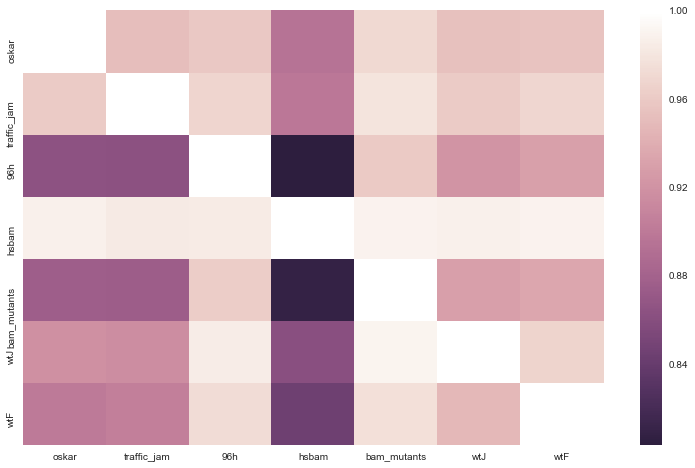

In [69]:
plt.figure(figsize=(13,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True,  reverse=True)
sns.heatmap(df_pairwise_similarity, cmap =cmap)

In [28]:
from sklearn.cluster import KMeans

In [29]:
X1 = np.transpose(data_frames['wtJ'].values)
X2 = np.transpose(data_frames['hsbam'].values)
X3 = np.transpose(data_frames['bam_mutants'].values)

//anaconda/envs/py34/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


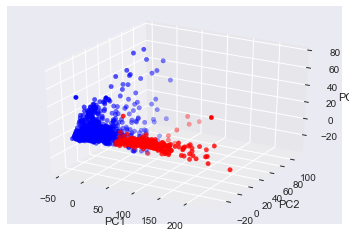

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X1_normalized = StandardScaler().fit_transform(X1)

kmeans = KMeans(n_clusters=2).fit(X1_normalized)
labels = kmeans.predict(X1_normalized)

num_1_labels = np.sum(labels)
num_0_labels = np.size(labels) - np.sum(labels)
num_features = np.size(X1, axis=1)

X_label_0 = np.zeros((num_0_labels, num_features))
X_label_1 = np.zeros((num_1_labels, num_features))

row_counter0 = 0
row_counter1 = 0
for i in range(0, np.size(labels)):
    if labels[i] == 0:
        X_label_0[row_counter0, :] = X1_normalized[i, :]
        row_counter0 += 1
    elif labels[i] == 1:
        X_label_1[row_counter1, :] = X1_normalized[i, :]
        row_counter1 += 1

pca = PCA(n_components=3)
pca.fit(X1_normalized)

principalComponents0 = pca.transform(X_label_0)
principalComponents1 = pca.transform(X_label_1)

xs1 = principalComponents0[:, 0]
ys1 = principalComponents0[:, 1]
zs1 = principalComponents0[:, 2]

xs2 = principalComponents1[:, 0]
ys2 = principalComponents1[:, 1]
zs2 = principalComponents1[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs1, ys1, zs1, color='r')
ax.scatter(xs2, ys2, zs2, color='b')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()





In [ ]:
123: 661